# Homework 0

**Name:** -- Víctor Manuel Mariscal Cervantes --

**e-mail:** -- victor.mariscal4459@alumnos.udg.mx --

# MODULES

In [26]:
# Load modules
import numpy as np  # For numerical computations
import matplotlib.pyplot as plt  # For plotting results
import random  # For generating random numbers
from matplotlib.colors import LogNorm  # For logarithmic normalization in contour plots

# This magic command ensures that plots are displayed inline in the notebook
%matplotlib inline

# Theory on the Gradient Descent Algorithm

Gradient Descent is an iterative optimization algorithm used to find the minimum of a function. The algorithm works as follows:

1. **Initialization:** Start with an initial guess for the parameters (e.g., a point in the function's domain).

2. **Gradient Computation:** Calculate the gradient (i.e., the vector of partial derivatives) of the function at the current point. This gradient indicates the direction of steepest ascent.

3. **Parameter Update:** Update the parameters by moving in the opposite direction of the gradient. The update rule is given by:

$$
\mathbf{x}_{\text{new}} = \mathbf{x}_{\text{current}} - \alpha \nabla f(\mathbf{x}_{\text{current}})
$$

where $\alpha$ is the learning rate which determines the size of the step.

4. **Convergence Check:** Repeat steps 2 and 3 until the change in parameters is less than a predefined tolerance, indicating that a minimum has been reached.

In this notebook, we use the Himmelblau function, a well-known function with multiple local minima, to demonstrate gradient descent.

## Himmelblau Function and Its Partial Derivatives

The **Himmelblau function** is defined as:

$$
f(x,y) = (x^2 + y - 11)^2 + (x + y^2 - 7)^2
$$

This function has multiple local minima and is often used as a test function for optimization algorithms.

The partial derivatives of the function are:

$$ \frac{\partial f}{\partial x} = 4x(x^2 + y - 11) + 2(x + y^2 - 7) $$

$$ \frac{\partial f}{\partial y} = 2(x^2 + y - 11) + 4y(x + y^2 - 7) $$

These derivatives are used to update the parameters in the gradient descent algorithm.

In [27]:
# Function to be optimized
def himmelblau(x, y):
    r"""
    Himmelblau function:
    
    Defined as:
      f(x, y) = (x² + y - 11)² + (x + y² - 7)²
    
    Returns the function value at (x, y).
    """
    return (x**2 + y - 11)**2 + (x + y**2 - 7)**2

def grad_himmelblau(x, y):
    r"""
    Gradient of the Himmelblau function.
    
    The partial derivatives are:
      \( \frac{\partial f}{\partial x} = 4x(x^2 + y - 11) + 2(x + y^2 - 7) \)
      \( \frac{\partial f}{\partial y} = 2(x^2 + y - 11) + 4y(x + y^2 - 7) \)
    
    Returns a NumPy array with the derivatives with respect to x and y.
    """
    dfdx = 4 * x * (x**2 + y - 11) + 2 * (x + y**2 - 7)
    dfdy = 2 * (x**2 + y - 11) + 4 * y * (x + y**2 - 7)
    return np.array([dfdx, dfdy])

In [46]:
# Run gradient descent algorithm

# Set parameters for gradient descent
learning_rate = 0.001       # Step size for each iteration
max_iters = 10000           # Maximum number of iterations allowed
tolerance = 1e-6            # Convergence tolerance

# Choose a random initial point within the range [-6, 6] for both x and y
x0 = random.uniform(-6, 6)
y0 = random.uniform(-6, 6)
x_current = np.array([x0, y0])
print("Initial point:", x_current)

# List to store the path taken by the algorithm (for later visualization)
path = [x_current.copy()]

# Execute the gradient descent loop
for i in range(max_iters):
    # Compute the gradient at the current point
    grad = grad_himmelblau(x_current[0], x_current[1])
    
    # Update the point by moving in the opposite direction of the gradient
    x_new = x_current - learning_rate * grad
    
    # Append the new point to the path
    path.append(x_new.copy())
    
    # Check for convergence: if the change in position is less than the tolerance, stop iterating
    if np.linalg.norm(x_new - x_current) < tolerance:
        print(f"Convergence reached at iteration {i}")
        break
    
    # Update the current point for the next iteration
    x_current = x_new

# Convert the list of points to a NumPy array for easier manipulation
path = np.array(path)

# Output the final position and function value
print("Final position:", x_current)
print("Final function value:", himmelblau(x_current[0], x_current[1]))

Initial point: [-5.31971741  1.28726527]
Convergence reached at iteration 167
Final position: [-2.80512919  3.13130451]
Final function value: 6.698783605065609e-09


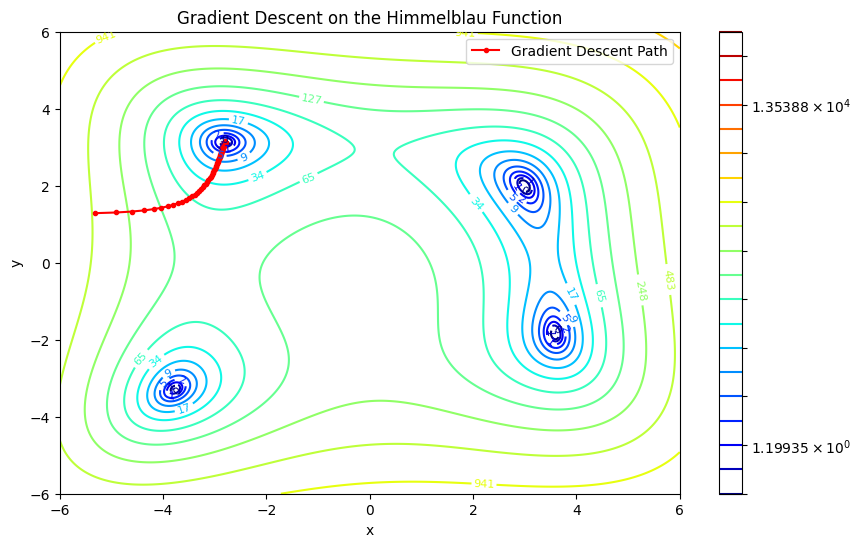

In [47]:
# Plot the results (2D Contour Plot)

# Create a grid of x and y values to evaluate the Himmelblau function
x_vals = np.linspace(-6, 6, 400)
y_vals = np.linspace(-6, 6, 400)
X, Y = np.meshgrid(x_vals, y_vals)

# Evaluate the Himmelblau function on the grid
Z = himmelblau(X, Y)

# Set up the plot
plt.figure(figsize=(10, 6))

# Plot the contour lines of the Himmelblau function
contour_levels = np.logspace(-0.5, 5, 20)  # Logarithmically spaced levels
contour_plot = plt.contour(X, Y, Z, levels=contour_levels, norm=LogNorm(), cmap='jet')
plt.clabel(contour_plot, inline=True, fontsize=8)

# Plot the path taken by the gradient descent algorithm
plt.plot(path[:, 0], path[:, 1], 'ro-', markersize=3, label='Gradient Descent Path')

# Label the plot
plt.xlabel('x')
plt.ylabel('y')
plt.title('Gradient Descent on the Himmelblau Function')
plt.legend()
plt.colorbar(contour_plot)

# Display the plot
plt.show()

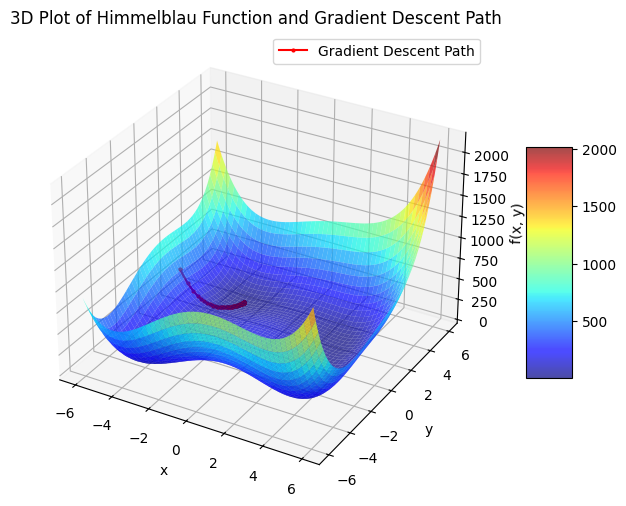

In [48]:
# 3D Plot of the Himmelblau Function and Gradient Descent Path

from mpl_toolkits.mplot3d import Axes3D  # Import for 3D plotting

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface of the Himmelblau function
surf = ax.plot_surface(X, Y, Z, cmap='jet', alpha=0.7)

# Plot the gradient descent path in 3D
ax.plot(path[:, 0], path[:, 1], himmelblau(path[:, 0], path[:, 1]), 'r.-', markersize=4, label='Gradient Descent Path')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
ax.set_title('3D Plot of Himmelblau Function and Gradient Descent Path')
ax.legend()
plt.colorbar(surf, ax=ax, shrink=0.5, aspect=5)
plt.show()

## Conclusion

In this notebook, I implemented the Gradient Descent algorithm to minimize the Himmelblau function. The process began by defining the Himmelblau function:

$$ f(x,y) = (x^2 + y - 11)^2 + (x + y^2 - 7)^2 $$

and its corresponding partial derivatives:

$$ \frac{\partial f}{\partial x} = 4x(x^2 + y - 11) + 2(x + y^2 - 7) $$
$$ \frac{\partial f}{\partial y} = 2(x^2 + y - 11) + 4y(x + y^2 - 7) $$

I then initialized a random starting point in the domain $[-6, 6]\times[-6, 6]$ and iteratively updated this point using the gradient descent update rule:

$$ \mathbf{x}_{\text{new}} = \mathbf{x}_{\text{current}} - \alpha \nabla f(\mathbf{x}_{\text{current}}) $$

with a learning rate $\alpha = 0.001$. The iterations continued until the change in the position was less than the tolerance of $1\times10^{-6}$ or until a maximum of 10,000 iterations was reached.

Throughout the process, I recorded the path of the descent, which allowed me to visualize how the algorithm converged to a local minimum. I used both a 2D contour plot and a 3D surface plot to illustrate the function's landscape and the gradient descent path.

This exercise helped me understand how gradient descent navigates complex, multi-modal functions like the Himmelblau function. By observing the descent path, I could see how the algorithm incrementally moved towards a local minimum despite the presence of multiple minima.

Overall, I learned how to implement and document gradient descent in Python, utilize LaTeX for clear mathematical notation, and effectively visualize optimization processes. This hands-on experience deepened my understanding of iterative optimization techniques and their practical applications.